# tl;dr:
With the right tools, you can take what might feel like the messiest data ever and use it in analysis.

In [59]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
import csv
import brewer2mpl
import matplotlib as mpl
import mpl_settings
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# Getting Game of Thrones ratings from IMDb

In [8]:
ratings_url = 'http://www.imdb.com/title/tt0944947/eprate'

In [9]:
print ratings_url

http://www.imdb.com/title/tt0944947/eprate


In [10]:
#Requests allows you to access website content

In [11]:
r = requests.get(ratings_url)

In [12]:
data = r.content

In [13]:
#What's the content look like?
print data


<!DOCTYPE html>
<html xmlns:og="http://opengraphprotocol.org/schema/"
      xmlns:fb="http://www.facebook.com/2008/fbml">
<head>
<meta http-equiv="content-type" content="text/html; charset=iso-8859-1">
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime()};</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
var addClickstreamHeadersToAjax = function(xhr) {
    xhr.setRequestHeader("x-imdb-parent-id", "1BTR8EADY7G9PNKVYNA5");
};
</script>

<title>&#x22;Game of Thrones&#x22; (2011)</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<link rel="canonical" href="http://www.imdb.com/title/tt0944947/eprate" /><meta property="og:url" content="http://www.imdb.com/title/tt0944947/eprate" />

<meta name="title" content="&#x22;Game of Thrones&#x22; (2011)">
<meta name="description" content="Game of Thrones on I

In [ ]:
#It's all HTML...

In [14]:
#Splitting the data to focus on content we care about
data = data.split('Rated Episodes')[1]
data = data.split('Unrated Episodes')[0]

---

# Using BeautifulSoup to parse HTML content

---

In [15]:
soup = bs(data, 'html.parser')

In [16]:
soup

\n<table>\n<tr bgcolor="#eeeeee">\n<th><a href="epdate">#</a></th>\n<th>Episode</th>\n<th>User<br>Rating</br></th>\n<th><a href="epvote">User<br>Votes</br></a></th>\n<th><br/></th>\n</tr>\n<tr>\n<td align="right">6.10\xa0</td>\n<td><a href="/title/tt4283094/">The Winds of Winter</a></td>\n<td align="right" bgcolor="#eeeeee">10.0</td>\n<td align="right">78,603</td>\n<td>\n<link href="http://i.media-imdb.com/images/SF86490d125684bb6a47cdfa12a86f7d98/css/min/rating.css" rel="stylesheet" type="text/css">\n<div class="rating rating-list" data-auth="BCYrpMK0WxJkD6CfCRumIASf3S-o3RdrUCCwdp-BR7QWBp6d2SJ798F4e8MO3jlIcmZnmZMyKf0qPnl0VOCpve5AMQbfunbcHpmO608dVcRqso6PqRCx8zt9JioOmak77siV" data-ga-identifier="" id="tt4283094|imdb|10.0|10.0|" title="Users rated this 10.0/10 (78,603 votes) - click stars to rate">\n<span class="rating-bg">\xa0</span>\n<span class="rating-imdb" style="width: 140px">\xa0</span>\n<span class="rating-stars">\n<a href="/register/login?why=vote" rel="nofollow" title="Register

In [20]:
print 'soup is a ',type(soup)
print 'data was a ', type(data)

soup is a  <class 'bs4.BeautifulSoup'>
data was a  <type 'str'>


# BeautifulSoup helps to see the content as a unicode string, without HTML

In [82]:
text = soup.get_text()

In [83]:
print text




#
Episode
UserRating
UserVotes



6.10 
The Winds of Winter
10.0
78,603



 
 

1
2
3
4
5
6
7
8
9
10

10.0/10
X
 



6.9 
Battle of the Bastards
9.9
122,266


 
 

1
2
3
4
5
6
7
8
9
10

9.9/10
X
 



3.9 
The Rains of Castamere
9.9
48,954


 
 

1
2
3
4
5
6
7
8
9
10

9.9/10
X
 



5.8 
Hardhome
9.9
53,700


 
 

1
2
3
4
5
6
7
8
9
10

9.9/10
X
 



6.5 
The Door
9.7
37,126


 
 

1
2
3
4
5
6
7
8
9
10

9.7/10
X
 



4.2 
The Lion and the Rose
9.7
28,142


 
 

1
2
3
4
5
6
7
8
9
10

9.7/10
X
 



4.6 
The Laws of Gods and Men
9.7
23,257


 
 

1
2
3
4
5
6
7
8
9
10

9.7/10
X
 



4.8 
The Mountain and the Viper
9.7
26,304


 
 

1
2
3
4
5
6
7
8
9
10

9.7/10
X
 



2.9 
Blackwater
9.7
20,002


 
 

1
2
3
4
5
6
7
8
9
10

9.7/10
X
 



4.10 
The Children
9.6
20,758


 
 

1
2
3
4
5
6
7
8
9
10

9.6/10
X
 



1.9 
Baelor
9.5
16,527


 
 

1
2
3
4
5
6
7
8
9
10

9.5/10
X
 



3.4 
And Now His Watch Is Ended
9.5
15,757


 
 

1
2
3
4
5
6
7
8
9
10

9.5/10
X
 



4.9 
The Watchers on the Wall
9.5

In [84]:
print type(text)

<type 'unicode'>


# A ton of manual string removal...

In [85]:
#First, removing any existing commas (potentially in numbers or strings)
text = text.replace(',','')

#Next, getting rid of unneccessary formatting characters

In [86]:
#Removing the formatting used for the "star ratings" on the webpage
text = text.replace('1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n','')

In [87]:
#Removing that X at the end of each entry
text = text.replace('X\n','')

In [88]:
#Removing triple-spacing between episodes
text = text.replace('\n\n\n\n','\n\n')

In [89]:
text = text.replace(u'\n\n\xa0\n\xa0\n\n\n','\n')

In [90]:
text = text.replace('\n',',\n')

In [91]:
#Fixing the top line
text = text.replace(',\n,\n,','')

In [92]:
text = text.replace(',\n,\n','\n')

In [93]:
#Replacing gross unicode spaces
text = text.replace(u'\xa0','')

In [94]:
text = text.replace('UserVotes','UserVotes,\n')

In [95]:
text = text.replace('\n',',\n').replace(',,',',').replace('\n,\n','\n\n')

In [96]:
text = text.replace(',\n#','#')

In [97]:
#Renaming headers...
text = text.replace('Episode','EpisodeName')
text = text.replace('#','Episode')
text = text.replace('UserVotes,','UserVotes,\nRating,')

In [98]:
text = text.replace(',\n',',')

# Results in this:

In [99]:
print text

Episode,EpisodeName,UserRating,UserVotes,Rating,
6.10,The Winds of Winter,10.0,78603,10.0/10,
6.9,Battle of the Bastards,9.9,122266,9.9/10,
3.9,The Rains of Castamere,9.9,48954,9.9/10,
5.8,Hardhome,9.9,53700,9.9/10,
6.5,The Door,9.7,37126,9.7/10,
4.2,The Lion and the Rose,9.7,28142,9.7/10,
4.6,The Laws of Gods and Men,9.7,23257,9.7/10,
4.8,The Mountain and the Viper,9.7,26304,9.7/10,
2.9,Blackwater,9.7,20002,9.7/10,
4.10,The Children,9.6,20758,9.6/10,
1.9,Baelor,9.5,16527,9.5/10,
3.4,And Now His Watch Is Ended,9.5,15757,9.5/10,
4.9,The Watchers on the Wall,9.5,20290,9.5/10,
6.2,Home,9.5,26573,9.5/10,
5.9,The Dance of Dragons,9.4,22199,9.4/10,
1.10,Fire and Blood,9.4,14685,9.4/10,
2.10,Valar Morghulis,9.4,13963,9.4/10,
1.7,You Win or You Die,9.2,12718,9.2/10,
6.4,Book of the Stranger,9.2,17566,9.2/10,
1.6,A Golden Crown,9.1,12377,9.1/10,
4.7,Mockingbird,9.1,12877,9.1/10,
4.1,Two Swords,9.1,16545,9.1/10,
3.10,Mhysa,9.0,12509,9.0/10,
1.5,The Wolf and the Lion,9.0,12698,9.0/10,
2.6,The Old

# Writing this data to a csv file so that it can be processed with pandas

In [41]:
with open('test.csv', 'w+') as f:
    f.write(text)

df = pd.read_csv('test.csv')

df = df[['Episode','EpisodeName','UserRating','UserVotes','Rating']]

df.head()

,Episode,EpisodeName,UserRating,UserVotes,Rating
0,6.1,The Winds of Winter,10.0,78603,10.0/10
1,6.9,Battle of the Bastards,9.9,122266,9.9/10
2,3.9,The Rains of Castamere,9.9,48954,9.9/10
3,5.8,Hardhome,9.9,53700,9.9/10
4,6.5,The Door,9.7,37126,9.7/10


In [100]:
#Where are the 10's ???

# Sometimes you clean a car to find you also need to replace a part...

In [43]:
[round(x,3) for x in df['Episode']]

[6.1,
 6.9,
 3.9,
 5.8,
 6.5,
 4.2,
 4.6,
 4.8,
 2.9,
 4.1,
 1.9,
 3.4,
 4.9,
 6.2,
 5.9,
 1.1,
 2.1,
 1.7,
 6.4,
 1.6,
 4.7,
 4.1,
 3.1,
 1.5,
 2.6,
 5.7,
 1.8,
 3.8,
 1.1,
 3.5,
 2.7,
 4.3,
 3.3,
 2.3,
 5.1,
 2.5,
 2.1,
 4.4,
 3.1,
 2.4,
 2.8,
 1.2,
 6.3,
 1.4,
 3.6,
 5.4,
 4.5,
 3.7,
 1.3,
 5.5,
 6.7,
 3.2,
 5.3,
 5.2,
 2.2,
 6.1,
 5.1,
 6.6,
 6.8,
 5.6]

In [44]:
#Cannot replace all periods, user ratings will be affected...
#Use a placeholder for now, and fix in pandas
text = text.replace('.10','.TEN')

with open('test.csv', 'w+') as f:
    f.write(text)

In [45]:
df = pd.read_csv('test.csv')

df = df[['Episode','EpisodeName','UserRating','UserVotes','Rating']]

df.head()

,Episode,EpisodeName,UserRating,UserVotes,Rating
0,6.TEN,The Winds of Winter,10.0,78603,10.0/10
1,6.9,Battle of the Bastards,9.9,122266,9.9/10
2,3.9,The Rains of Castamere,9.9,48954,9.9/10
3,5.8,Hardhome,9.9,53700,9.9/10
4,6.5,The Door,9.7,37126,9.7/10


In [46]:
df['Episode'] = [e.replace('TEN','10') for e in df['Episode']]

In [47]:
#Breaking up the Episode column into Seasons and Episodes

In [48]:
df['Season'] = [int(e[0]) for e in df['Episode']]

In [49]:
df['Episode'] = [int(e.split('.')[1]) for e in df['Episode']]

In [50]:
df['Episode'] = ["%02d" % (e,) for e in df['Episode']]

In [51]:
df

,Episode,EpisodeName,UserRating,UserVotes,Rating,Season
0,10,The Winds of Winter,10.0,78603,10.0/10,6
1,09,Battle of the Bastards,9.9,122266,9.9/10,6
2,09,The Rains of Castamere,9.9,48954,9.9/10,3
3,08,Hardhome,9.9,53700,9.9/10,5
4,05,The Door,9.7,37126,9.7/10,6
5,02,The Lion and the Rose,9.7,28142,9.7/10,4
6,06,The Laws of Gods and Men,9.7,23257,9.7/10,4
7,08,The Mountain and the Viper,9.7,26304,9.7/10,4
8,09,Blackwater,9.7,20002,9.7/10,2
9,10,The Children,9.6,20758,9.6/10,4


In [52]:
df['EpisodeID'] = df["Season"].map(str) + df["Episode"]

In [53]:
df = df[['EpisodeID','Season','Episode','EpisodeName','UserRating','UserVotes']]

# FIXED

In [54]:
df

,EpisodeID,Season,Episode,EpisodeName,UserRating,UserVotes
0,610,6,10,The Winds of Winter,10.0,78603
1,609,6,09,Battle of the Bastards,9.9,122266
2,309,3,09,The Rains of Castamere,9.9,48954
3,508,5,08,Hardhome,9.9,53700
4,605,6,05,The Door,9.7,37126
5,402,4,02,The Lion and the Rose,9.7,28142
6,406,4,06,The Laws of Gods and Men,9.7,23257
7,408,4,08,The Mountain and the Viper,9.7,26304
8,209,2,09,Blackwater,9.7,20002
9,410,4,10,The Children,9.6,20758


In [55]:
df.sort_values(by='EpisodeID',ascending=True,inplace=True)

/Users/ctirol/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Visualizing the data...  Any trends?

/Users/ctirol/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Open Sans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


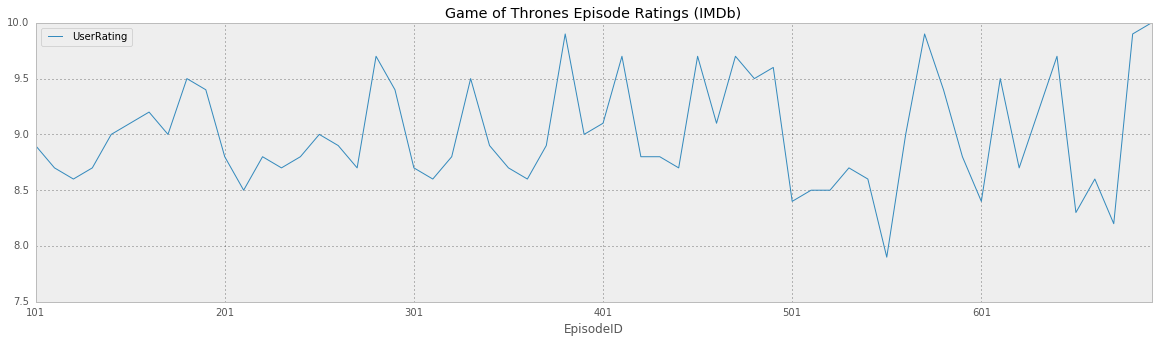

In [56]:
df.plot(x='EpisodeID',
        y='UserRating',
        legend=True,
        title='Game of Thrones Episode Ratings (IMDb)',
        figsize=(20,5))

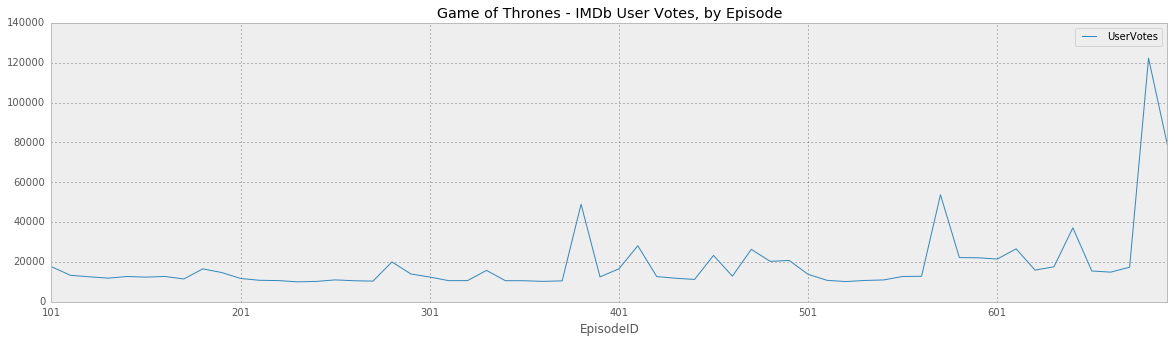

In [57]:
df.plot(x='EpisodeID',
        y='UserVotes',
        legend=True,
        title='Game of Thrones - IMDb User Votes, by Episode',
        figsize=(20,5))

In [69]:
df.reset_index(inplace=True)

# Save all the things!  Saving the dataframe to a csv file

In [343]:
df.to_csv('ratings.csv',index=False)

---

# Now that we have ratings data, what other data can we explore?  
Is there data out there that can help to predict a 10/10 episode?

---

In [ ]:
table = 'imdb_ratings'

In [ ]:
import sqlite3
conn = sqlite3.connect('got.db')
c = conn.cursor()
sent_df.to_sql(table,conn)
conn.commit()
conn.close()